In [ ]:
import tensorflow as tf
import tensorflow_hub as hub
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import os
import requests
from io import BytesIO

In [ ]:
# Load the model from TensorFlow Hub
hub_model = hub.load('https://tfhub.dev/google/magenta/arbitrary-image-stylization-v1-256/2')

In [ ]:
def load_img_from_url(url):
    max_dim = 512

    # Fetch the image from URL
    response = requests.get(url)
    response.raise_for_status()
    img_data = response.content

    # Decode the image data
    img = tf.image.decode_image(img_data, channels=3)
    img = tf.image.convert_image_dtype(img, tf.float32)

    # Resize the image
    shape = tf.cast(tf.shape(img)[:-1], tf.float32)
    long_dim = max(shape)
    scale = max_dim / long_dim
    new_shape = tf.cast(shape * scale, tf.int32)

    img = tf.image.resize(img, new_shape)
    img = img[tf.newaxis, :]
    return img

In [ ]:
# Load your images
content_image = load_img_from_url('https://i.pngimg.me/thumb/f/720/e6f82de227.jpg')
style_image = load_img_from_url('https://i.pinimg.com/originals/56/ca/08/56ca0884d4c9ee802fe2770b30666944.jpg')

In [ ]:
# Perform style transfer
stylized_image = hub_model(tf.constant(content_image), tf.constant(style_image))[0]

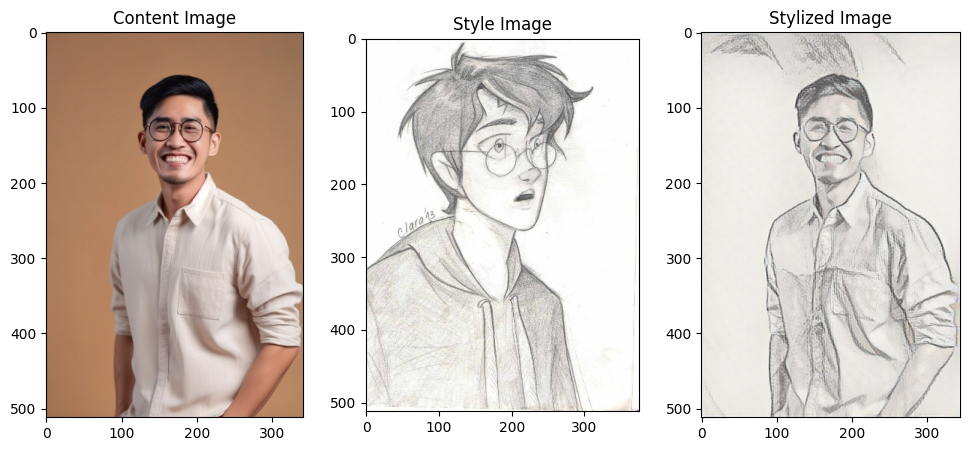

In [ ]:
# Helper function to deprocess and display images
def imshow(image, title=None):
    if len(image.shape) > 3:
        image = tf.squeeze(image, axis=0)
    plt.imshow(image)
    if title:
        plt.title(title)

# Display images
plt.figure(figsize=(12, 5))
plt.subplot(1, 3, 1)
imshow(content_image, 'Content Image')

plt.subplot(1, 3, 2)
imshow(style_image, 'Style Image')

plt.subplot(1, 3, 3)
imshow(stylized_image, 'Stylized Image')
plt.show()